In [1]:
import uproot
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.rcParams['text.usetex'] = True

plt.rcParams['patch.linewidth'] = 0
plt.rcParams['patch.edgecolor'] = 'none'

sns.set_style("whitegrid")

In [2]:
df_jets = {'df': uproot.open('./hardQCD_jets.root')['tnjets'].arrays(library='pd'),				'color' : 'blue', 	'label': 'jets'}


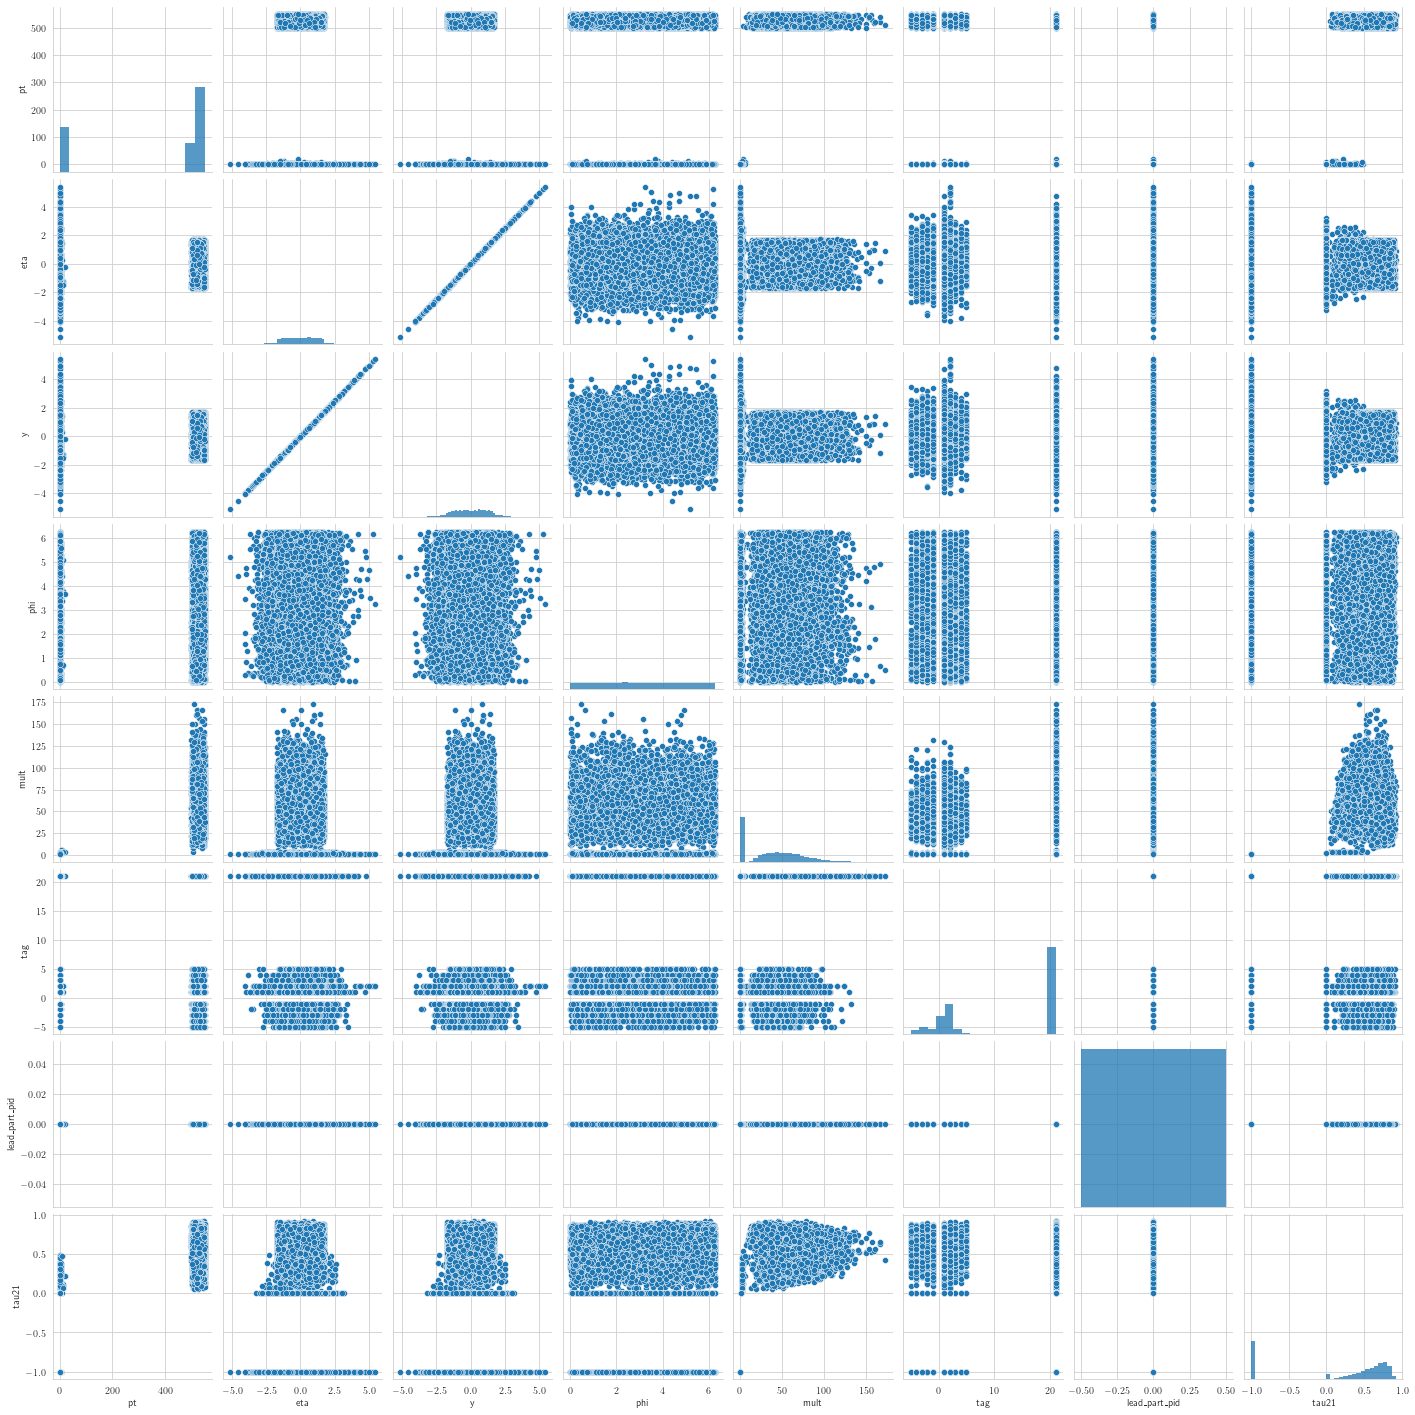

In [3]:
g = sns.pairplot(df_jets['df'])
plt.show()

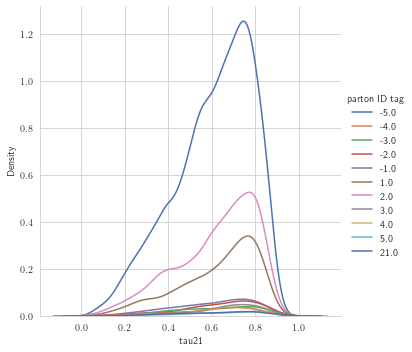

In [4]:
df = df_jets['df']
_p = sns.displot(data=df[df['tau21']>0], x='tau21', hue='tag', kind='kde', palette = 'deep')
_p._legend.set_title('parton ID tag')


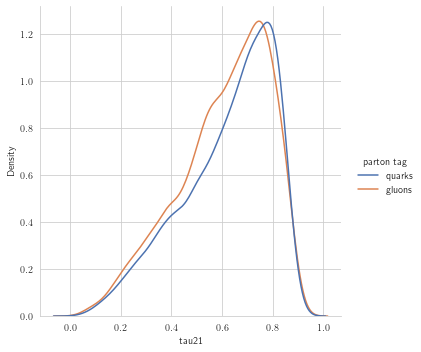

In [5]:
df_quarks = uproot.open('./hardQCD_jets.root')['tnjets'].arrays(library='pd')
df_quarks = df_quarks[df_quarks['tag']<21]
df_quarks['label'] = 'quarks'

df_gluons = uproot.open('./hardQCD_jets.root')['tnjets'].arrays(library='pd')
df_gluons = df_gluons[df_gluons['tag']>=21]
df_gluons['label'] = 'gluons'
df_labelled = pd.concat([df_quarks, df_gluons])
_p = sns.displot(data=df_labelled[df_labelled['tau21']>0], x='tau21', hue='label', kind='kde', palette = 'deep')
_p._legend.set_title('parton tag')


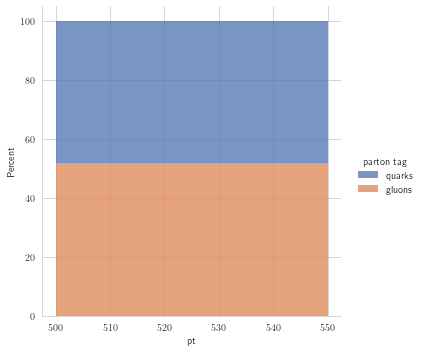

In [6]:
_p = sns.displot(data=df_labelled[df_labelled['pt']>500], x='pt', stat='percent', hue='label', kind='hist', kde=False, multiple="stack", palette = 'deep', binwidth=50)
_p._legend.set_title('parton tag')